# HW_Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Section 1: Business Understanding

### Section 1.1: Hypothesies

- Hypothesis 1: Employee Tenure for those who left will be significantly different than those who left

- Hypothesis 2: Employee satisfaction for those who stayed will be significantly different than those who left

- Hypothesis 3: Average monthly hours will be significantly different for those who stayed vs those who left.

## Section 2: Data Preprocessing

In [2]:
# import the data

df = pd.read_csv('data/turnover.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##### There are no missing values in this data set, and based on our descriptive statistics, on the surface there does not appear to be any data quality issues or anything that would lead us to believe that there is some huge outlier or data that has been inaccurately entered, so no, there are most likely not any data quality issues.

In [7]:
# Inspecting the sales column
df['sales'].nunique()

10

In [8]:
df.groupby('sales').size()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [9]:
# Renaming sales to department because that is more accurate
df.rename(columns={'sales':'dept'}, inplace=True)
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
#One hot encoding the dummy variables. We need dummies because these columns are unordered categorical variables.
df = pd.get_dummies(df, columns=["salary", "dept"], prefix=["salary", "dept"])
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.rename(columns={'satisfaction_level':'happy','last_evaluation':'last_eval','number_project':'projects',
                  'average_montly_hours':'hours','time_spend_company':'tenure','Work_accident':'work_accident',
                  'promotion_last_5years':'promotion'}, inplace=True)

df.head(3)

,happy,last_eval,projects,hours,tenure,work_accident,left,promotion,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Section 3: Data Visualization

### Section 3.1: Hours Worked and Retention

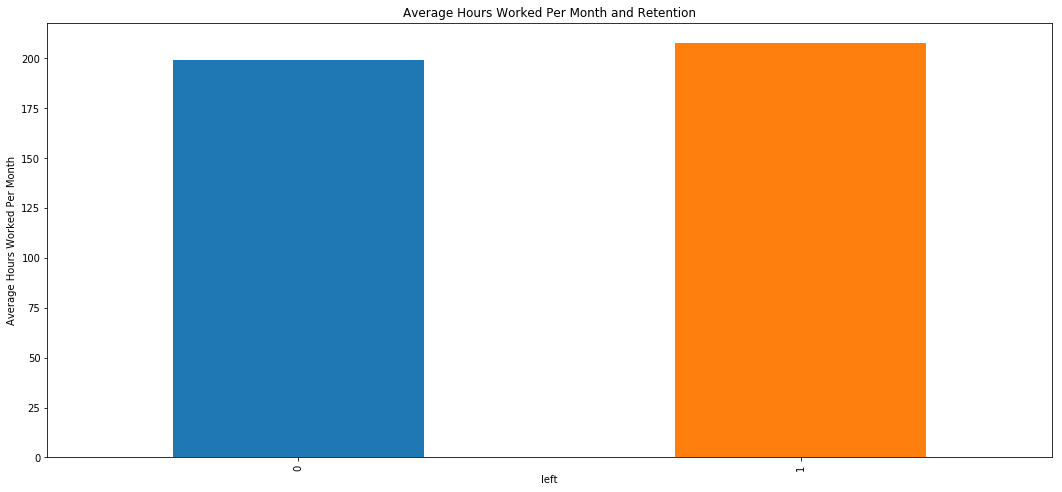

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=[18,8])
plt.ylabel('Average Hours Worked Per Month')
plt.title('Average Hours Worked Per Month and Retention')
df.groupby('left')['hours'].mean().plot(kind='bar')

##### There does not seem to be a significant difference in average hours worked between people that left and people that stayed

### Section 3.2: Happiness and Retention

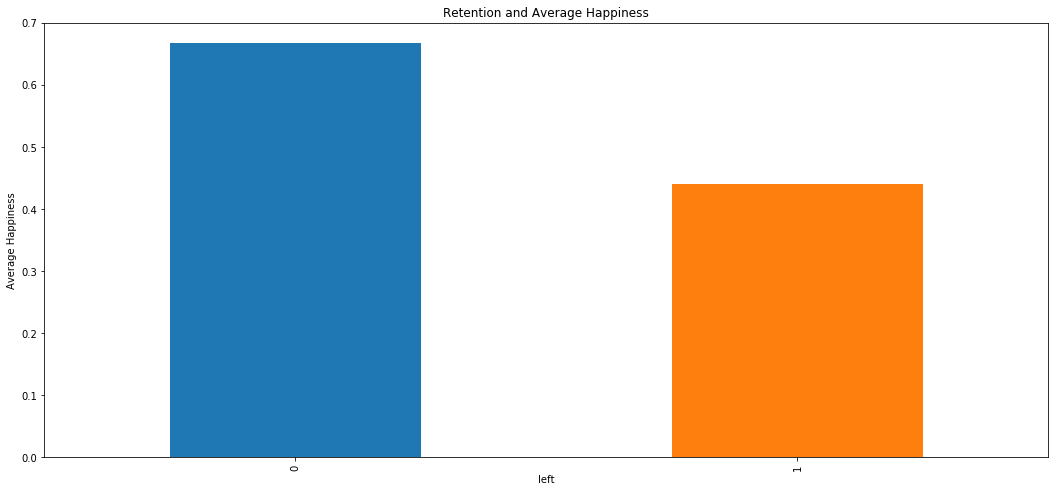

In [17]:
plt.figure(figsize=[18,8])
plt.ylabel('Average Happiness')
plt.title('Retention and Average Happiness')
df.groupby('left')['happy'].mean().plot(kind='bar')

##### There is a clear negative reationship between happiness and churn, and the happier employees are, the less likely they are to leave.

### Section 3.3: Salary and Retention

#### Section 3.3.1: High salary and retention

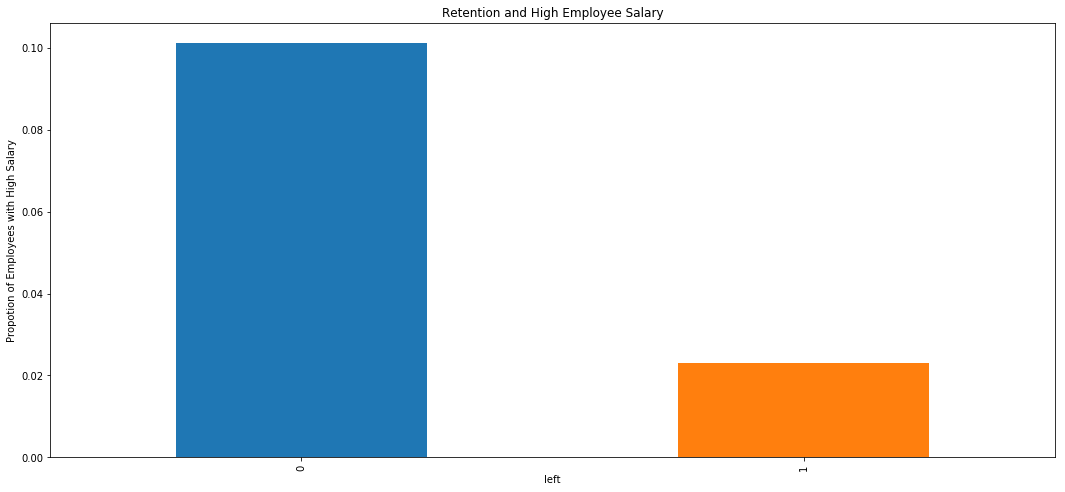

In [23]:
plt.figure(figsize=[18,8])
plt.ylabel('Propotion of Employees with High Salary')
plt.title('Retention and High Employee Salary')
df.groupby('left')['salary_high'].mean().plot(kind='bar')

#### It seems that employees that have high salaries do not leave as frequently.

### Section 3.3.2: Low Salary and Retention

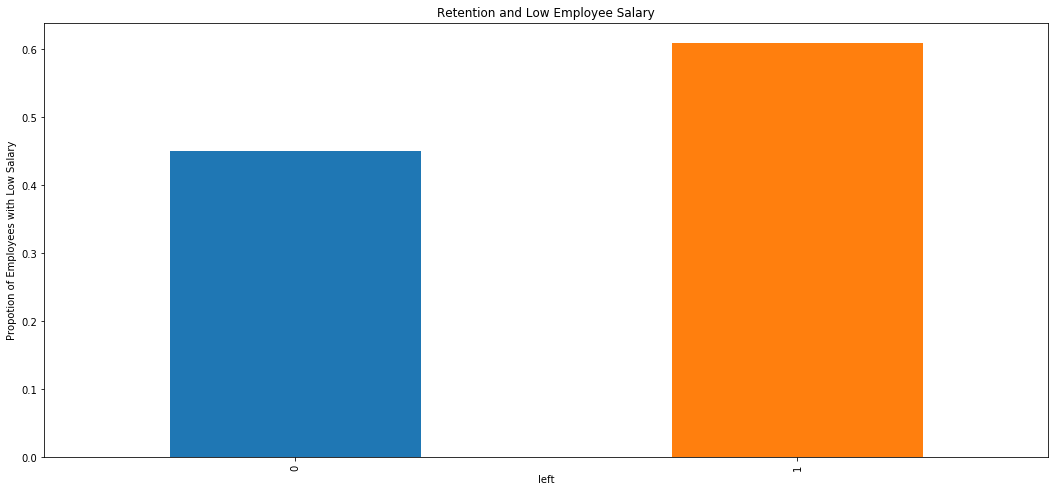

In [35]:
plt.figure(figsize=[18,8])
plt.ylabel('Propotion of Employees with Low Salary')
plt.title('Retention and Low Employee Salary')
df.groupby('left')['salary_low'].mean().plot(kind='bar')

#### It appears that employees that are paid lower salaries tend to leave more frequently

### Section 3.4: Promotion and Retention

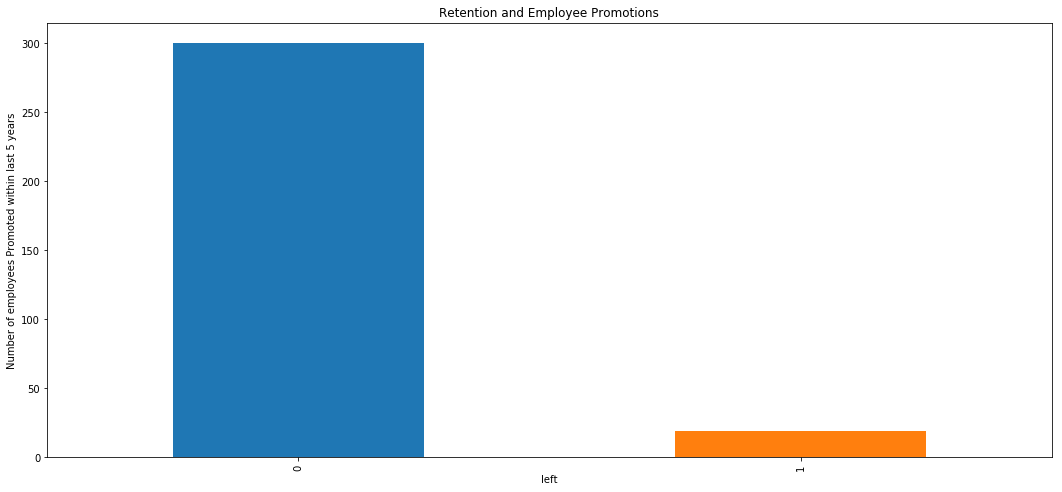

In [39]:
plt.figure(figsize=[18,8])
plt.ylabel('Number of employees Promoted within last 5 years')
plt.title('Retention and Employee Promotions')
df.groupby('left')['promotion'].sum().plot(kind='bar')

#### Those employees who got a promotion within the last 5 years stayed much more often than those that did not.

### Section 3.5: Average Tenure and Retention

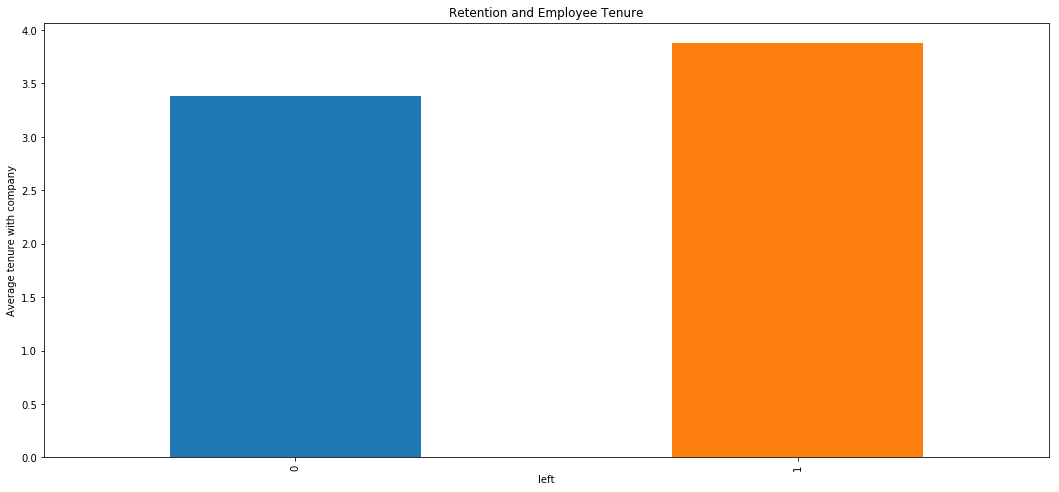

In [40]:
plt.figure(figsize=[18,8])
plt.ylabel('Average tenure with company')
plt.title('Retention and Employee Tenure')
df.groupby('left')['tenure'].mean().plot(kind='bar')

#### The longer someone is with the company, the more likely the are to end up leaving the company

### Section 3.6: Last evaluation and Retention

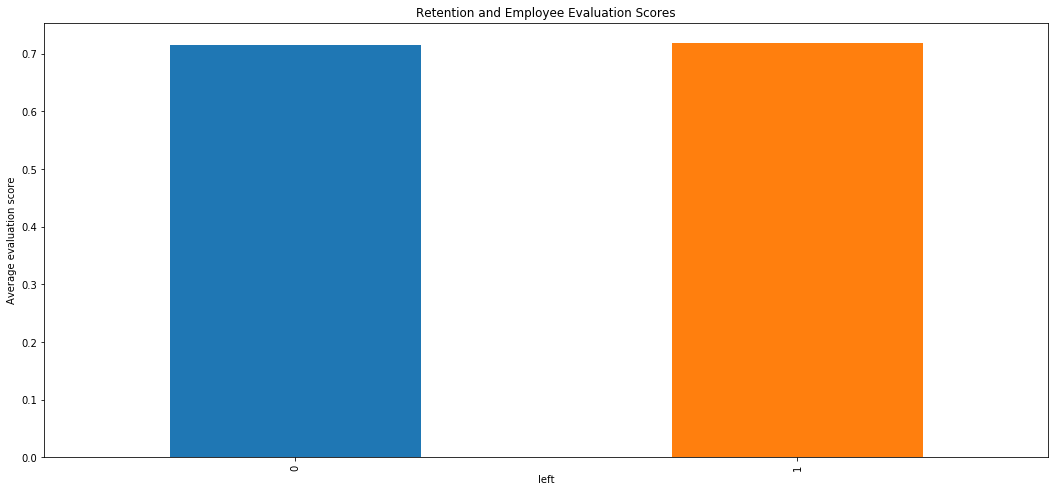

In [42]:
plt.figure(figsize=[18,8])
plt.ylabel('Average evaluation score')
plt.title('Retention and Employee Evaluation Scores')
df.groupby('left')['last_eval'].mean().plot(kind='bar')

#### There appears to be no difference in people who leave vs those that dont in terms of their most recent performance evaluation.

### Section 3.7: Average Projects and Retention

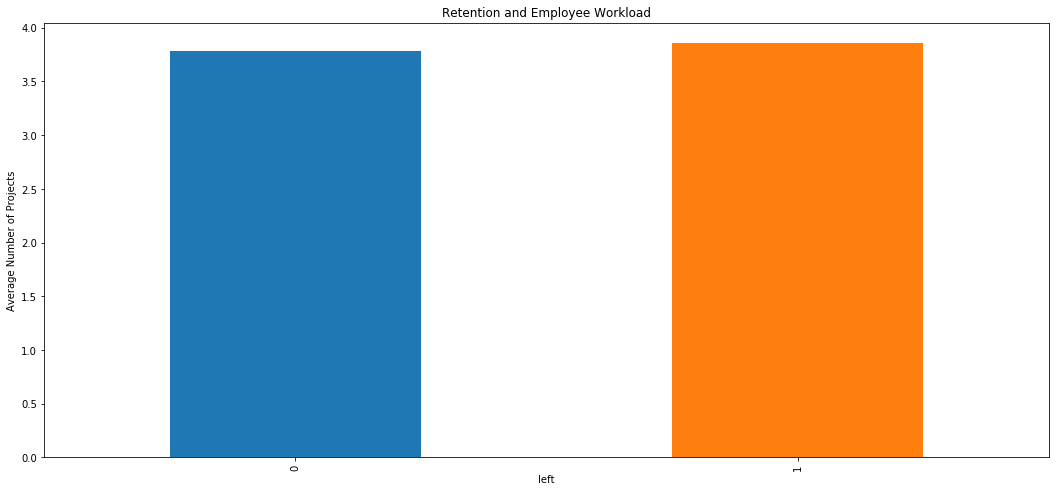

In [43]:
plt.figure(figsize=[18,8])
plt.ylabel('Average Number of Projects')
plt.title('Retention and Employee Workload')
df.groupby('left')['projects'].mean().plot(kind='bar')

#### There doesnt seem to be a difference in the number of projects between people that leave and stay.

### Section 3.8: Work Accidents and Retention

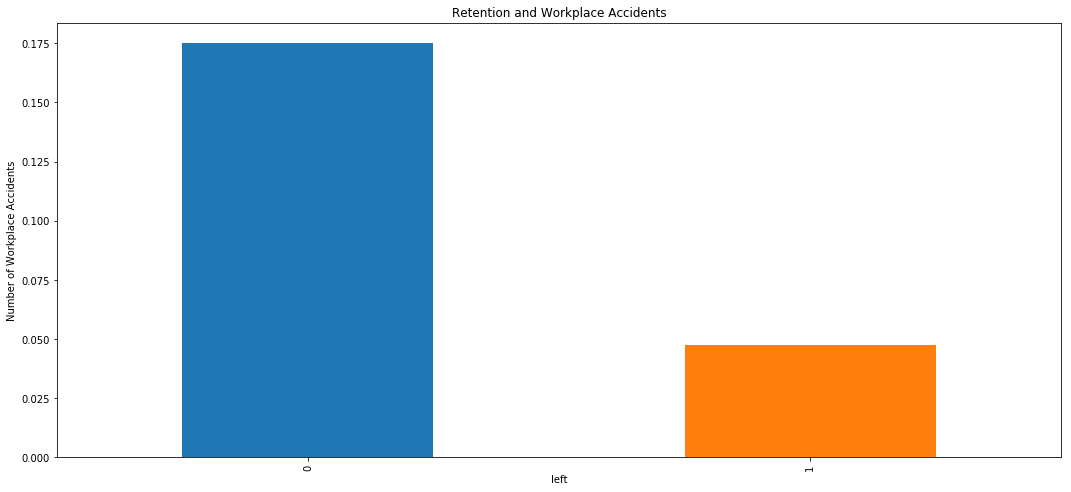

In [45]:
plt.figure(figsize=[18,8])
plt.ylabel('Rate of Workplace Accidents')
plt.title('Retention and Workplace Accidents')
df.groupby('left')['work_accident'].mean().plot(kind='bar')

#### Interestingly enough people that stayed tended to have more workplace accidents than people that left.

## Section 4: Exploratory Data Analysis

### Section 4.1: Correlation Analysis

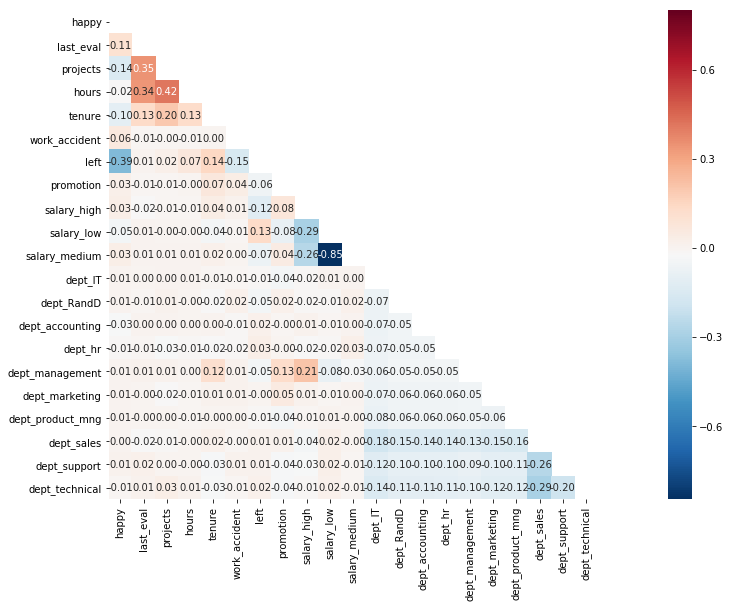

In [48]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,9))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f", cmap='RdBu_r', mask=mask)

#### The variables that are highly correlated with each other are:

        1: Average Monthly Hours and the number of Projects are fairly positively correlated, and this makes sense, as we
           would expect that as an employee had more work, the longer it would take them to complete that work,
           and the more time they would have to spend at work to get it done.
           
        2: Salary_Medium and Salary_low are highly negatively correlated with each other.
        
        3: Salary_High and Being a manager are somewhat positively correlated, and that makes sense

### Section 4.2: Hypotheis Testing

- Hypothesis 1: Employee tenure for those who left will be significantly different than those who left

- Hypothesis 2: Employee satisfaction for those who stayed will be significantly different than those who left

- Hypothesis 3: Average monthly hours will be significantly different for those who stayed vs those who left.

#### Section 4.2.1: Tenure t-test

In [62]:
#Average tenure by left vs not
df.groupby('left')['tenure'].mean()

left
0    3.380032
1    3.876505
Name: tenure, dtype: float64

In [61]:
# Comparing average tenure of people who left vs who stayed

from statsmodels.stats.multicomp import pairwise_tukeyhsd


print pairwise_tukeyhsd(df['tenure'], df['left'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     0.4965  0.4422 0.5508  True 
-------------------------------------------


- People who left had been with the company significantly longer than those who stayed

#### Section 4.2.2: Happiness t-test

In [63]:
df.groupby('left')['happy'].mean()

left
0    0.666810
1    0.440098
Name: happy, dtype: float64

In [51]:
# Comparing happiness of people who left vs people who stayed

from statsmodels.stats.multicomp import pairwise_tukeyhsd

print pairwise_tukeyhsd(df['happy'], df['left'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.2267  -0.2353 -0.2181  True 
---------------------------------------------


- People who left were significantly less happy than those who did not leave

#### Section 4.2.3: Average Monthly Hours T-Test

In [64]:
df.groupby('left')['hours'].mean()

left
0    199.060203
1    207.419210
Name: hours, dtype: float64

In [52]:
# Comparing hours of people who left vs people who stayed


from statsmodels.stats.multicomp import pairwise_tukeyhsd

print pairwise_tukeyhsd(df['hours'], df['left'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      1     8.359   6.487 10.2311  True 
-------------------------------------------


- People that left worked significantly more hours than people who did not leave

## Section 5: Model building

### Section 5.1: KNN Classifier

In [65]:
# declare X variables and y variable
y = df['left']
X = df.drop(['left'], axis=1)

# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()

knn = knn.fit(X_train, y_train)

#Model evaluation without valdation

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))


0.9364444444444444
--------------------------------------------------------
[[3261  201]
 [  85  953]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.94      0.96      3462
          1       0.83      0.92      0.87      1038

avg / total       0.94      0.94      0.94      4500

--------------------------------------------------------
0.930026413947633


In [66]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.93137908 0.92933333 0.92133333 0.92466667 0.92133333 0.93066667
 0.95       0.938      0.95263509 0.94863242]
0.9347979925620707


### Section 5.2: Decision Tree Classifier

In [67]:
# declare X variables and y variable
y = df['left']
X = df.drop(['left'], axis=1)

# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier(random_state=0)

# Train a decision tree model
dt = dt.fit(X_train, y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.9764444444444444
--------------------------------------------------------
[[3388   74]
 [  32 1006]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      3462
          1       0.93      0.97      0.95      1038

avg / total       0.98      0.98      0.98      4500

--------------------------------------------------------
0.9738982779174723


In [68]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.98201199 0.98533333 0.97133333 0.96466667 0.96133333 0.97866667
 0.98866667 0.994      1.         1.        ]
0.982601199200533


### Section 5.3: Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9882222222222222

In [70]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.9882222222222222
[[3449   13]
 [  40  998]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3462
          1       0.99      0.96      0.97      1038

avg / total       0.99      0.99      0.99      4500



In [75]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns),reverse=True)

Features sorted by their rank:
[(0.2901, 'happy'), (0.1987, 'projects'), (0.1691, 'hours'), (0.165, 'tenure'), (0.127, 'last_eval'), (0.0101, 'work_accident'), (0.0081, 'salary_high'), (0.0055, 'salary_low'), (0.0037, 'salary_medium'), (0.0037, 'dept_technical'), (0.0034, 'dept_sales'), (0.0026, 'dept_support'), (0.002, 'dept_IT'), (0.0018, 'dept_accounting'), (0.0017, 'dept_management'), (0.0016, 'promotion'), (0.0015, 'dept_product_mng'), (0.0015, 'dept_RandD'), (0.0014, 'dept_marketing'), (0.0014, 'dept_hr')]


In [73]:
# evaluate the random forest model using 10-fold cross-validation
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.99866755 0.99733333 0.97933333 0.98       0.97533333 0.992
 0.99866667 0.998      1.         1.        ]
0.9919334221630024


### Section 5.4: Logistic Regression

In [76]:
# Building the logistic regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.7908888888888889
--------------------------------------------------------
[[3202  260]
 [ 681  357]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.92      0.87      3462
          1       0.58      0.34      0.43      1038

avg / total       0.77      0.79      0.77      4500

--------------------------------------------------------
0.6344147691033617


In [77]:
# evaluate the logistic regression model using 10-fold cross-validation
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.80746169 0.79066667 0.79466667 0.78533333 0.80466667 0.80533333
 0.792      0.78866667 0.74516344 0.73582388]
0.7849782350421786


## Section 6: Feature Selection

### Section 6.1: Non-Recursive Feature Selection

In [78]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[3.80e-01 1.57e+02 0.00e+00]
 [8.00e-01 2.62e+02 0.00e+00]
 [1.10e-01 2.72e+02 0.00e+00]
 ...
 [3.70e-01 1.43e+02 0.00e+00]
 [1.10e-01 2.80e+02 0.00e+00]
 [3.70e-01 1.58e+02 0.00e+00]]


In [79]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[0 3 5]


In [80]:
X.head(1)

,happy,last_eval,projects,hours,tenure,work_accident,promotion,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### This model says that the most important predictors are: 

        1: Happiness
        2: Average Hours Worked per month
        3: Work Accident

### Section 6.2: Recursive Feature Selection

In [81]:
model = RandomForestClassifier(n_estimators=20)
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False False False False False False
 False False False False False False False False]
[ 1  2  1  1  1  3 11  7  4  9 13 15 10 12 14 16 17  5  8  6]


In [82]:
X.head(1)

,happy,last_eval,projects,hours,tenure,work_accident,promotion,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [83]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,happy,1
1,last_eval,2
2,projects,1
3,hours,1
4,tenure,1
5,work_accident,3
6,promotion,11
7,salary_high,7
8,salary_low,4
9,salary_medium,9


#### According to the RFE model, the 4 most important factors in determining if someone will leave or stay are happiness, the number of projects someone has, the average number of hours they work, and their tenure with the company.

## Section 7: Model Selection

### Section 7.1: Explaining the best model

- The best model that I was able to produce was the random forest classifer with 20 decision trees. The model ended up having an average accuracy of 0.9919334221630024 after 10-fold cross validation, which is very accurate. 

## Section 8: Learning a new algorithm

In [85]:
from sklearn import svm

# Building the Support Vector Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.7908888888888889
--------------------------------------------------------
[[3202  260]
 [ 681  357]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.92      0.87      3462
          1       0.58      0.34      0.43      1038

avg / total       0.77      0.79      0.77      4500

--------------------------------------------------------
0.6344147691033617


In [86]:
# evaluate the logistic regression model using 10-fold cross-validation
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.77348434 0.77266667 0.78266667 0.78066667 0.786      0.778
 0.77666667 0.76733333 0.75717145 0.74382922]
0.7718485010882226


## Section 9: Storytelling

- A: Hypothesis testing:

    - Based on the t-tests I performed to test my hypotheses, I found that there was a statistically significant difference
      between the length of time someone had been with the company, and their liklihood of leaving. People that had been 
      there longer were more likely to leave.
      
    - People who left the company were statistically significantly less happy than those who stayed.
    
    - People who left the company worked statistically significantly more hours than those who did not leave the company.
    
    
- B: Important factors that determined who is likely to leave:

    - According to the RFE model, the 4 most important factors in determining if someone will leave or stay are happiness,
      the number of projects someone has, the average number of hours they work, and their tenure with the company. This
      gives us a better idea of the factors that influence people's decision to leave or stay.
      
    - The managerial implications of this are that we can identify employees that are at a higher risk of leaving if they
      display those characteristics. For example, if we have an employee that is working over 210 hours per month, they 
      report being less happy than average, they have a lot of projects, and they have been with the company for a while,
      we can say that that person is at a high risk of leaving, and we can try to do something to alleviate their suffering
      before they decide to quit if we want to keep them around.
      
      
- C: Technical Implications:

    - Some additional data that would've been helpful I think is someone's education level. It would be interesting to see 
      if there were differences in the rate of people leaving between educational groups.

##### On my honor as a student, I have neither given nor received any unauthorized aid on this academic work.

Eric VanMeerhaeghe